In [ ]:
from IPython.display import Markdown, display

display(Markdown("header.md"))

# Session 04 - Hypothesis testing

In [16]:
# Basic imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")
from pprint import pprint
import jupyter_black

jupyter_black.load()

## Normal distribution 

We will perform some computation on the normal distribution function.

### [easy] (already done in week1!) Normal PDF

Write a function that computes the probability distribution function of a normal distribution.

$\Large	\frac1{\sigma\sqrt{2\pi}}\; \exp\left(-\frac{\left(x-\mu\right)^2}{2\sigma^2} \right)$

Test your function by plotting it !

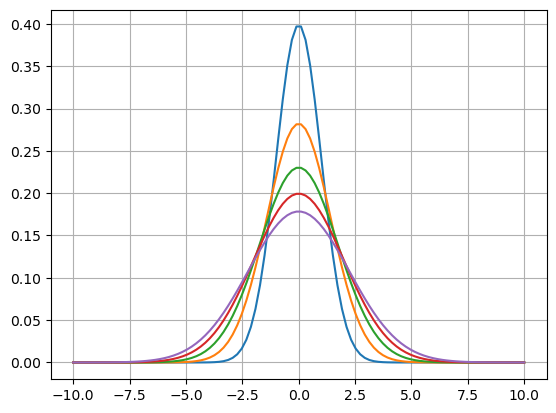

In [4]:
def msds_normal_pdf(x, mu, sigma2):
    return (
        1 / math.sqrt(2 * math.pi * sigma2) * math.exp(-((x - mu) ** 2) / (2 * sigma2))
    )


def test_msds_normal_pdf():
    assert msds_normal_pdf(0, 0, 1) == 1 / math.sqrt(2 * math.pi)
    X = np.linspace(-10, 10, num=100)
    Y = []
    for s in np.linspace(1, 5, num=5):
        Y = [msds_normal_pdf(x, 0, s) for x in X]
        plt.plot(X, Y)
        plt.grid()


test_msds_normal_pdf()

### [easy] Normal CDF

Write a function that computes the cumulative probability distribution function of a normal distribution.

${\displaystyle {\frac {1}{2}}\left(1+\mathrm {erf} \left({\frac {x-\mu }{\sigma {\sqrt {2}}}}\right)\right)\!~}$

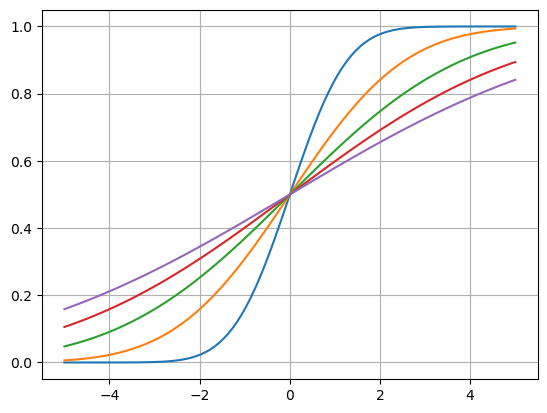

In [5]:
def msds_normal_cdf(x, mu, sigma2):
    return 0.5 * (1 + math.erf((x - mu) / (sigma2 * math.sqrt(2))))


def test_msds_normal_cdf():
    assert msds_normal_cdf(0, 0, 1) == 0.5
    X = np.linspace(-5, 5, num=100)
    Y = []
    for s in np.linspace(1, 5, num=5):
        Y = [msds_normal_cdf(x, 0, s) for x in X]
        plt.plot(X, Y)
        plt.grid(zorder=0)


test_msds_normal_cdf()

### [easy] Standardize data

Write a function that "standardize" some data by computing:

$\Large Z = \frac{X - \bar{X}}{S_X}$

with:
 - $\bar{X}$ is the sample mean
 - $S_{X}$ is the sample variance

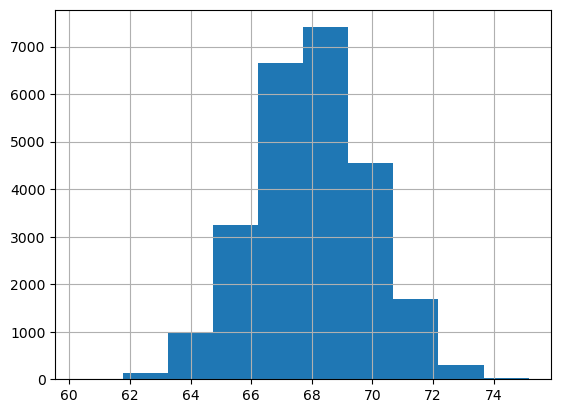

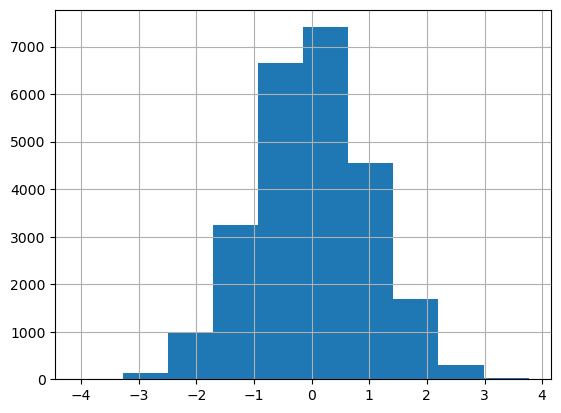

In [10]:
def msds_standardize(data):
    X = data
    X_bar = np.mean(X)
    S = np.std(X)
    Z = []
    for x in X:
        Z.append((x - X_bar) / S)
    return Z


def test_msds_standardize():
    data = [1, 2, 3, 4, 5]
    st_data1 = msds_standardize(data)
    assert np.mean(st_data1) < 1e-10
    assert (1 - np.var(st_data1, ddof=1)) < 1e-5
    wh = pd.read_csv("../Session_01/data/heights_weights.csv")
    weights = wh["Height(Inches)"]
    st_weights = msds_standardize(weights)
    weights.hist()
    plt.figure()
    pd.Series(st_weights).hist()


test_msds_standardize()

## [moderate] Plot histogram of standardized data and $N(0,1)$

Write a function that draws, given some data, the histogram of the standardized data and the standardized normal distribution.
In order to make a fair comparison, you will have to make some scaling adjustment...

This can be done to evaluate the normality of a data set.

Test on `heights_weights.csv`

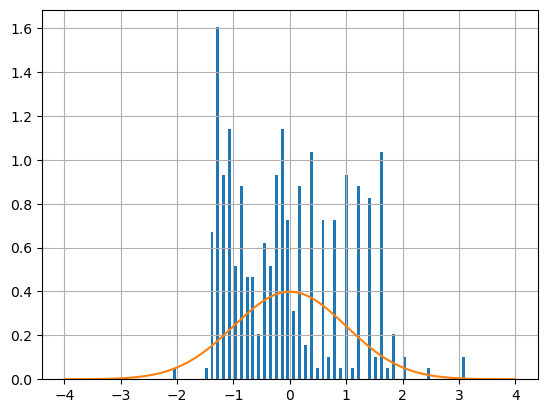

In [21]:
def msds_check_normality(data):
    plt.figure()
    pd.Series(data).hist(bins=100, density=True)
    X = np.linspace(-4, 4, num=100)
    Y = []
    for x in X:
        Y.append(msds_normal_pdf(x, 0, 1))
    sns.lineplot(x=X, y=Y)


def test_msds_check_normality():
    # weighs_heights = pd.read_csv("../Session_01/data/heights_weights.csv")
    # heights = msds_standardize(weighs_heights["Height(Inches)"])
    # msds_check_normality(heights)
    # weights = msds_standardize(weighs_heights["Weight(Pounds)"])
    # msds_check_normality(weights)
    # print(len(weights))

    salary = pd.read_csv("../Session_01/data/salary.csv")
    salary = msds_standardize(salary["Salary"])
    msds_check_normality(salary)


test_msds_check_normality()

## Hypothesis testing


### [moderate] Simple hypothesis testing for mean (variance known, two-tailed)

Write a function that will output a decision based on:
 - a risk level or significance level ($\alpha$)
 - a data sample
 - a mean value ($H_0$ is that the true mean is the value given)
 - the population variance ($\sigma^2$)

Compute the test statistic: 

$\Large Z = \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{N}}}$
Your function should output True is we accept $H_0$, False ortherwise.

Your function should also explain with prints why this decision is made.

Your function should also print the associated $p$-value.

Validate on the examples below:
 - $H_0$: the observed sample mean is 5.7 (10 samples), variance is 2 and population mean is $\mu=5$
 - $H_0$: the observed sample mean is 5.1 (10 samples), variance is 2 and population mean is $\mu=5$
 - $H_0$: the observed sample mean is 5.2 (100 samples), variance is 2 and population mean is $\mu=5$

**You don't have to compute Normal distribution's inverse CDF values, for that you can use packages!**

Take the time to play with the different parameters to check you understand completely what is going on!

In [31]:
from scipy.stats import norm  # 统计函数库


def msds_hyphothesis_mean_test(alpha, sample_mean, N, th_mean, sigma2):
    """(variance of population is known)"""

    Z = (sample_mean - th_mean) / (sigma2 / math.sqrt(N))
    critical_value = norm.ppf(1 - alpha / 2)
    pvalue = 2 * (1 - norm.cdf(Z))
    print(
        f"Test statistics: Z = {Z:.04f}, C = {critical_value:.04f}, pvalue = {pvalue:.04f}"
    )
    if abs(Z) > critical_value:
        print(f" ==> REJECT H0 (The mean is not likely to be {th_mean} )")
        return False
    else:
        print(f"==> ACCEPT H0 (The mean is likely to be {th_mean} )")
        return True


def test_msds_hyphothesis_mean_test():
    assert msds_hyphothesis_mean_test(0.1, 6, 10, 5, math.sqrt(2)) == False
    assert msds_hyphothesis_mean_test(0.1, 5.1, 100, 5, math.sqrt(2)) == True
    assert msds_hyphothesis_mean_test(0.05, 5.1, 1000, 5, math.sqrt(2)) == False


test_msds_hyphothesis_mean_test()

Test statistics: Z = 2.2361, C = 1.6449, pvalue = 0.0253
 ==> REJECT H0 (The mean is not likely to be 5 )
Test statistics: Z = 0.7071, C = 1.6449, pvalue = 0.4795
==> ACCEPT H0 (The mean is likely to be 5 )
Test statistics: Z = 2.2361, C = 1.9600, pvalue = 0.0253
 ==> REJECT H0 (The mean is not likely to be 5 )


### [moderate] Simple hypothesis testing for mean (variance unknown, two-tailed)

Write a very simialar function, but when variance is not known.

In this case the $Z$ statistics will follow a Student's T distribution.

**You don't have to compute Student's T distribution's inverse CDF values, for that you can use a library such as `scipy.stats`!**


In [37]:
def twoSum(nums, target):
    n = len(nums)
    for i in range(n - 1):
        for j in range(i + 1, n):
            if nums[i] + nums[j] == target:
                return [i, j]

In [38]:
print(twoSum([2, 7, 11, 15], 9))

[0, 1]


In [33]:
from scipy.stats import t


def msds_hyphothesis_mean_test_t(alpha, sample_mean, N, th_mean, sample_variance):
    """
    Perform a sample mean statistical test(variance of population is known)
    """

    sigma2 = sample_variance
    Z = (sample_mean - th_mean) / (sigma2 / math.sqrt(N))
    df = N - 1
    critical_value = t.ppf(1 - alpha / 2, df=df)
    pvalue = 2 * (1 - t.cdf(Z, df=df))
    print(
        f"Test statistics: Z = {Z:.04f}, C = {critical_value:.04f}, pvalue = {pvalue:.04f}"
    )
    if abs(Z) > critical_value:
        print(f" ==> REJECT H0 (The mean is not likely to be {th_mean} )")
        return False
    else:
        print(f"==> ACCEPT H0 (The mean is likely to be {th_mean} )")
        return True


def test_msds_hyphothesis_mean_test2():
    assert msds_hyphothesis_mean_test_t(0.1, 6, 10, 5, math.sqrt(2)) == False
    assert msds_hyphothesis_mean_test_t(0.1, 5.1, 100, 5, math.sqrt(2)) == True
    assert msds_hyphothesis_mean_test_t(0.05, 5.1, 1000, 5, math.sqrt(2)) == False


test_msds_hyphothesis_mean_test2()

Test statistics: Z = 2.2361, C = 1.8331, pvalue = 0.0522
 ==> REJECT H0 (The mean is not likely to be 5 )
Test statistics: Z = 0.7071, C = 1.6604, pvalue = 0.4812
==> ACCEPT H0 (The mean is likely to be 5 )
Test statistics: Z = 2.2361, C = 1.9623, pvalue = 0.0256
 ==> REJECT H0 (The mean is not likely to be 5 )


### [moderate] Application to data (single tail)

Grand Junction Vegetables is a producer of a wide variety of frozen vegetables. The
company president has asked you to determine if the weekly sales of 16-ounce packages
of frozen broccoli has increased. The mean weekly number of sales per store has been
2400 packages over the past 6 months. You have obtained a random sample of sales
data from 134 stores for your study. The data are contained in the data file `broccoli.csv`.

 - Evaluate the situation by performing a hypothesis test
 - state $H_0$ and $H_1$
 - compute test statistics and formulate your answer to your president!



In [35]:
# H0: mu = 2400
# H1: mu > 2400 (single tail)
df = pd.read_csv("../Session_04/data/broccoli.csv", sep=";")
df

,Broccoli,Broccoli Price,Peas,Peas Price
0,890,"1,080000043",9557,"0,790000021"
1,17630,"0,689999998",19452,"0,680000007"
2,6831,"0,589999974",520,"0,790000021"
3,1248,"0,699999988",460,"0,790000021"
4,413,"0,779999971",586,"0,790000021"
...,...,...,...,...
129,696,"0,709999979",391,"0,790000021"
130,1855,"1,070000052",1335,"1,070000052"
131,2052,"0,850000024",9907,"0,75999999"
132,1827,"1,080000043",2812,"1,070000052"
